Train a custom Word2Vec model on a small dataset. Train embeddings on a domain-specific corpus (e.g., legal,
medical) and analyze how embeddings capture domain-specific semantics.

In [2]:
import gensim
from gensim.models import Word2Vec
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# Sample domain-specific corpus (Medical)
medical_corpus = [
    "The patient was diagnosed with diabetes and prescribed metformin.",
    "Hypertension can be managed with lifestyle changes and medication.",
    "The MRI scan showed abnormalities in the brain tissue.",
    "Patients with asthma should avoid exposure to allergens.",
    "The new drug showed promising results in clinical trials.",
    "Surgery was performed to remove the tumor successfully.",
    "Doctors recommend regular exercise to prevent cardiovascular diseases.",
    "The vaccine helps in boosting the immune response against infections.",
    "Genetic factors play a significant role in the onset of Alzheimer's disease.",
    "Antibiotics should be used responsibly to prevent resistance."
]

In [4]:
# Basic text preprocessing function (tokenization & lowercasing)
def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

In [12]:
# Preprocess corpus manually
preprocessed_corpus = [simple_tokenize(sentence) for sentence in medical_corpus]
print("preprocessed corpus")
print(preprocessed_corpus)

preprocessed corpus
[['the', 'patient', 'was', 'diagnosed', 'with', 'diabetes', 'and', 'prescribed', 'metformin'], ['hypertension', 'can', 'be', 'managed', 'with', 'lifestyle', 'changes', 'and', 'medication'], ['the', 'mri', 'scan', 'showed', 'abnormalities', 'in', 'the', 'brain', 'tissue'], ['patients', 'with', 'asthma', 'should', 'avoid', 'exposure', 'to', 'allergens'], ['the', 'new', 'drug', 'showed', 'promising', 'results', 'in', 'clinical', 'trials'], ['surgery', 'was', 'performed', 'to', 'remove', 'the', 'tumor', 'successfully'], ['doctors', 'recommend', 'regular', 'exercise', 'to', 'prevent', 'cardiovascular', 'diseases'], ['the', 'vaccine', 'helps', 'in', 'boosting', 'the', 'immune', 'response', 'against', 'infections'], ['genetic', 'factors', 'play', 'a', 'significant', 'role', 'in', 'the', 'onset', 'of', 'alzheimer', 's', 'disease'], ['antibiotics', 'should', 'be', 'used', 'responsibly', 'to', 'prevent', 'resistance']]


In [6]:
# Train Word2Vec model
model = Word2Vec(sentences=preprocessed_corpus, vector_size=50, window=5, min_count=1, workers=4)


In [14]:
# Extract word embeddings for visualization
words = list(model.wv.index_to_key)  # Get vocabulary words
print("vocabulary words")
print(words)
word_vectors = [model.wv[word] for word in words]  # Get corresponding embeddings
print("word vectors")
print(word_vectors)

vocabulary words
['the', 'to', 'in', 'with', 'prevent', 'be', 'should', 'showed', 'and', 'was', 'exposure', 'abnormalities', 'allergens', 'new', 'asthma', 'patients', 'tissue', 'brain', 'drug', 'avoid', 'mri', 'scan', 'results', 'medication', 'changes', 'lifestyle', 'managed', 'can', 'hypertension', 'metformin', 'prescribed', 'diabetes', 'diagnosed', 'patient', 'promising', 'resistance', 'responsibly', 'role', 'infections', 'genetic', 'factors', 'play', 'a', 'significant', 'onset', 'trials', 'of', 'alzheimer', 's', 'disease', 'antibiotics', 'used', 'against', 'response', 'immune', 'boosting', 'helps', 'vaccine', 'diseases', 'cardiovascular', 'exercise', 'regular', 'recommend', 'doctors', 'successfully', 'tumor', 'remove', 'performed', 'surgery', 'clinical']
word vectors
[array([-1.05753506e-03,  4.09383618e-04,  1.01866592e-02,  1.80540420e-02,
       -1.86288785e-02, -1.42710730e-02,  1.29382964e-02,  1.80454459e-02,
       -1.00803915e-02, -7.56969489e-03,  1.46942735e-02, -3.1371146

In [11]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

In [15]:
# Create DataFrame for visualization
df_embeddings = pd.DataFrame(reduced_vectors, columns=["x", "y"], index=words)


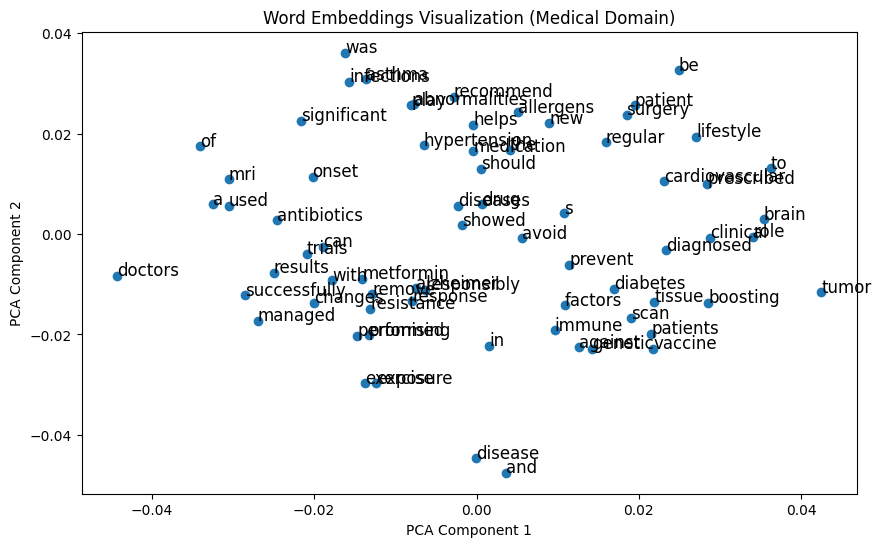

In [16]:
# Plot embeddings
plt.figure(figsize=(10, 6))
plt.scatter(df_embeddings["x"], df_embeddings["y"], marker='o')

for word, (x, y) in zip(df_embeddings.index, reduced_vectors):
    plt.text(x, y, word, fontsize=12)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Word Embeddings Visualization (Medical Domain)")
plt.show()


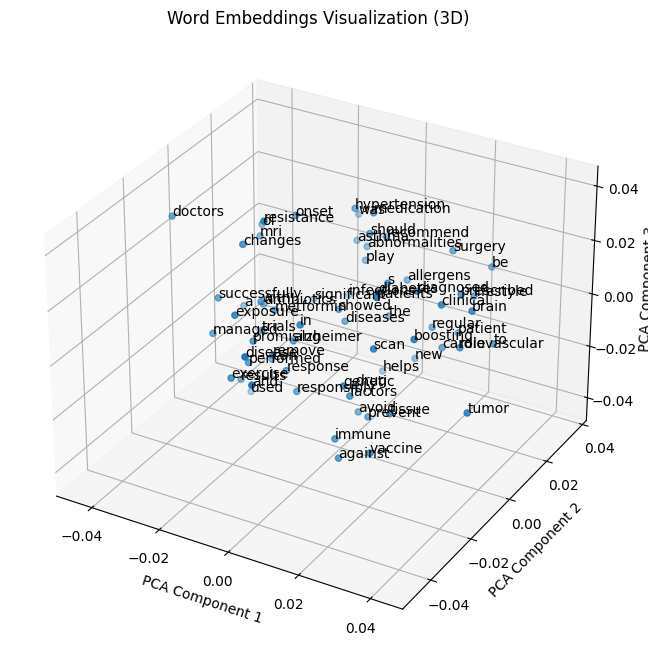

In [17]:

#3 d plot
# Import necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
from sklearn.decomposition import PCA

# ... (rest of your code)

# Perform PCA with 3 components
pca = PCA(n_components=3)  # Change n_components to 3
reduced_vectors = pca.fit_transform(word_vectors)

# Create DataFrame for visualization
df_embeddings = pd.DataFrame(reduced_vectors, columns=["x", "y", "z"], index=words) #add z

# Plot embeddings in 3D
fig = plt.figure(figsize=(10, 8))  # Adjust figure size if needed
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

ax.scatter(df_embeddings["x"], df_embeddings["y"], df_embeddings["z"], marker='o')

for word, (x, y, z) in zip(df_embeddings.index, reduced_vectors):
    ax.text(x, y, z, word, fontsize=10)  # Adjust fontsize if needed

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")  # Add z-axis label
ax.set_title("Word Embeddings Visualization (3D)")

plt.show()









